<a href="https://colab.research.google.com/github/Katleho10/Mall-Customer-Segmentation/blob/main/Mall_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents
1. Introduction
2. Defining the problem statement
3. Imports
4. EDA
5. K-Means Clustering summary
6. Model Interpretation 
7. Benefits of customer segmentation
8. Saving the kmeans clustering model and the data with cluster label

### 1. Introduction

Market segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.


Malls or shopping complexes are often involved in the race to increase their customers and hence making huge profits. To achieve this task machine learning can be applied. The shopping complexes make use of their customers data and develop ML models to target the right ones.


### 2. Defining the problem statement

You own the mall and want to understand the customers l who can easily be a target market so that the it can be given to marketing team and plan the strategy accordingly

We have four features in our datasets -

Customer Id
Gender
Age
Annual Income
Spending Score

Based on the above data we have to find a group of customer, which are unique in their own way. So that proper marketing strategy can be defined for each group and targeted separately.

### 3. Imports

In [1]:
import numpy as np                                      # For Mathematical calculations 
import pandas as pd                                     # For data manipulation and analysis 
import seaborn as sns                                   # For data visualisation
import matplotlib.pyplot as plt                         # For plotting graphs
from sklearn.tree import DecisionTreeClassifier         # For building decision tree models 
from sklearn.model_selection import train_test_split    # For splitting datasets into training and testing subsets
from sklearn.metrics import classification_report       # Provides a summary of various classification metrics
from sklearn import tree                                # Provides various classes and functions for working with decision trees
from sklearn import metrics                             # Provides various metrics and evaluation functions for assessing the performance of machine learning models
import warnings                                         # Filters and ignore warnings related to potential future changes in Python or library versions
warnings.filterwarnings('ignore')                       

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
#Show first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
#check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Show info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.drop('CustomerID', axis=1, inplace=True)

### 4. EDA

In [8]:
# Check to see descriptive statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


From the above  table, we can see that there are no values to clean. Age looks normally distributed, annual income in the thousands doesn't have outliers that are too excessive. Spending score is between 1 and 100. 

In [9]:
#Count the occurrences of gender
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

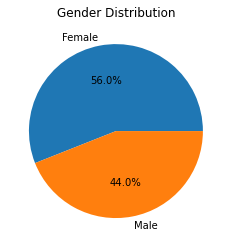

In [10]:
#Visualise gender using pie chart
Gender_counts = {'Female': 112, 'Male': 88}

plt.pie(Gender_counts.values(), labels=Gender_counts.keys(), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

* There are more women than men in this dataset

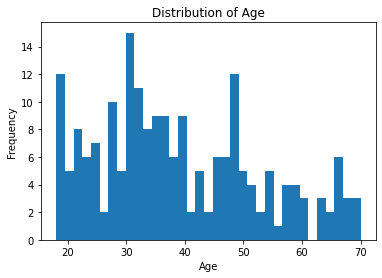

In [11]:
# Create the histogram showing age
plt.hist(df['Age'], bins=35)

# Add a title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

* There are equal number of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

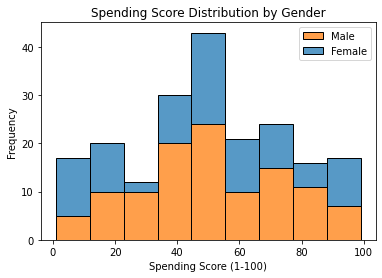

In [12]:
#Spending Score Distribution by Gender
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', multiple='stack')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Spending Score (1-100)')
plt.legend(['Male', 'Female'])
plt.ylabel('Frequency')
plt.show()

* Women have higher Spending Score than men.

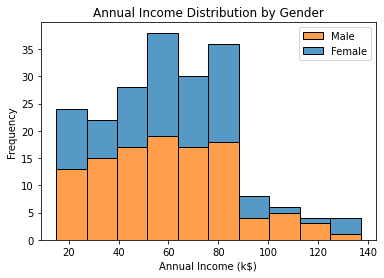

In [13]:
#Annual Income Distribution by Gender
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', multiple='stack')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.legend(['Male', 'Female'])
plt.show()

* Women have lower income than men, the majority falling between 45 000 and 80,000

In [14]:
# Create data sets by gender
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

In [15]:
# Print the average Annual Income for men and women
print(male_customers['Annual Income (k$)'].mean())
print(female_customers['Annual Income (k$)'].mean())

62.22727272727273
59.25


* Male have higher annual income than female

In [16]:
# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


* Women on average had a higher spending score by about 3 points

### 5. K-Means Clustering summary

* K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 
* The Centroid is a point that represent each cluster.
* To implement K-Means clustering, we need to look at the Elbow Method.
* The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset. 

In [17]:
### Feature selection for the model
#Considering only 2 features (Annual income and Spending Score)
X= df.iloc[:, [2,3]].values

In [18]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans using Elbow Mmethod
#To figure out K for KMeans, I will use ELBOW Method on KMEANS Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia - is the formula used to segregate the data points into clusters
    #WCSS is - it is total within cluster sum of squares

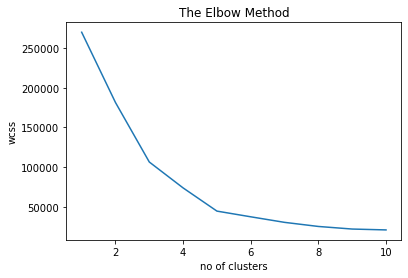

In [19]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
#Last elbow comes at k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#fit_predict() is used in clustering algorithms to simplify the process of training the model and predicting the cluster labels in a single step. 
#y_kmeans is the final model

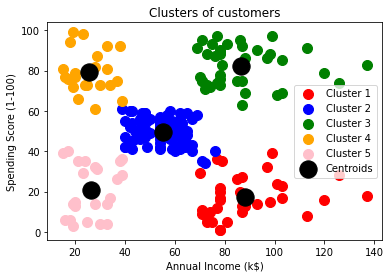

In [21]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'Black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### How the K-means algorithm works

K-means algorithm starts with randomly initialized centroids, assigns data points to the nearest centroid, updates the centroids based on the assigned data points, and repeats these steps until convergence. The algorithm aims to minimize the sum of squared distances within each cluster and create distinct clusters based on the data's similarity.


### 6. Model Interpretation 

* Cluster 1 (Red Colour) -> earning high but spending less. These are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities should try to add new facilities so that they can attract these people and can meet their needs.
* Cluster 2 (Blue Colour) -> average in terms of earning and spending. These people will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
* Cluster 3 (Green Color) -> earning high and also spending high. These people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.
* Cluster 4 (Orange Color) -> earning less but spending more. These are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
* Cluster 5 (Pink Color) -> Earning less , spending less. These is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.


###### We can put Cluster 1 into some alerting system where email can be send to them on daily basis as they are the target market.  Others we can set like once in a week or once in a month ######


### 7. Benefits of customer segmentation

* It enables companies to target specific groups of customers 
* When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs. It's easier for companies to send those customers special offers meant to encourage them to buy more products. Futhermore,Customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship.
* Customer segmentation can also improve customer service and assist in customer loyalty and retention.
* Staying a step ahead of competitors in specific sections of the market and identifying new products that existing or potential customers could be interested in or improving products. to meet customer expectations


### 8. Saving the kmeans clustering model and the data with cluster label

In [22]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeansmodel, "kmeansmodel.pkl")

['kmeansmodel.pkl']

In [23]:
#Converting a clustering problem into 5-class classification problem classification problem. 
#The goal is to classify new data points into these pre-defined cluster segments
# Creating a target column "Cluster" for storing the cluster segments
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeansmodel.labels_})],axis=1)
cluster_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


In [24]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [25]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in cluster_df:
    if cluster_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(cluster_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(cluster_df[col])
            # Transform both training and testing data
            cluster_df[col] = le.transform(cluster_df[col])
     
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [27]:
cluster_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [29]:
#Saving clustered customer data for streamlit app
cluster_df.to_csv("Clustered_Mall_Customers.csv")

### Using Decision tree to train and test the model

In [31]:
df = pd.DataFrame(cluster_df)

# Drop the 'Cluster' column from the DataFrame 
X = df.drop(['Cluster'], axis=1)
y = df[['Cluster']]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* The separation of X and Y is done when preparing data for machine learning tasks, specifically for supervised learning algorithms
* The reason for dropping the 'Cluster' column and separating it into 'X' and 'y' is to create separate datasets for the independent variables ('X') and the target variable ('y')
* Independent variable ('X') will be used to make predictions or classify datapoints. This variables have predictive power
* Target Variable ('y') is a target variable I want to predict or classify. It contains claster labels. By assigning the 'Cluster' column to 'y', I am creating a separate variable that holds the cluster labels for each data point

In [32]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

* train_test_split: This is a function from the sklearn.model_selection module. It is used to randomly split the dataset into two subsets: the training set and the testing set. It shuffles the data to ensure randomization.

* X and y: These variables represent the input features (X) and the target variable (y). They are the datasets you obtained after dropping the target variable column and separating it from the input features, as explained earlier.

* test_size: This parameter specifies the proportion of the dataset that will be allocated to the testing set. In this case, it is set to 0.3, which means that 30% of the data will be used for testing, and the remaining 70% will be used for training.

* X_train, X_test, y_train, y_test: These variables store the resulting datasets after the split. X_train and y_train represent the training data, while X_test and y_test represent the testing data.

In [33]:
#Training data
X_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
82,1,67,54,41
191,0,32,103,69
57,1,69,44,46
109,1,66,63,48
8,1,64,19,3
...,...,...,...,...
167,0,33,86,95
56,0,51,44,50
31,0,21,30,73
101,0,49,62,48


In [34]:
#Testing data
X_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
165,0,36,85,75
144,1,25,77,12
70,1,70,49,55
161,0,29,79,83
163,0,31,81,93
137,1,32,73,73
44,0,49,39,28
182,1,46,98,15
111,0,19,63,54
18,1,52,23,29


In [35]:
#Decision_Tree
#I chose decision tree because it is not affected by feature scaling

#Creating a DecisionTreeClassifier object with the entropy criterion
model = DecisionTreeClassifier(criterion="entropy")

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

In [36]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0  0  0]
 [ 2 24  0  0  0]
 [ 0  1 10  0  0]
 [ 0  1  0  8  0]
 [ 0  0  0  0  7]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.92      0.92      0.92        26
           2       1.00      0.91      0.95        11
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         7

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



### Explanation of confusion matrix results

#### 1.	Confusion Matrix: 
*  It is a table that allows us to visualize the performance of the algorithm
* 	The above confusion matrix shows the counts of true positive predictions in the diagonal and the counts of false positive predictions in off-diagonal elements. Each row represents the true labels, and each column represents the predicted labels.
* 	For example, the value 7 in the top-left corner of the confusion matrix indicates that 7 instances of class 0 were correctly predicted as class 0.
* 	The other values in the confusion matrix represent similar information for the respective classes.

#### 2.	Precision:
* 	Precision is a measure of the model's ability to correctly predict the positive instances out of the total predicted positive instances.
* 	The precision values range from 0 to 1, where a higher value indicates better performance.
* 	For example, for class 0, the precision is 0.78, meaning that out of all the instances predicted as class 0, 78% were correct.

#### 3.	Recall:
* 	Recall (also known as sensitivity or true positive rate) measures the model's ability to correctly identify the positive instances out of the total actual positive instances.
* 	The recall values range from 0 to 1, where a higher value indicates better performance.
* 	For example, for class 2, the recall is 0.91, indicating that the model identified 91% of the actual instances belonging to class 2.

#### 4.	F1-Score:
* 	The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance.
* 	The F1-score values range from 0 to 1, where a higher value indicates better performance.
* 	For example, for class 4, the F1-score is 1.0, indicating a perfect balance between precision and recall for that class.

#### 5.	Support:
* 	Support represents the number of instances in each class in the actual dataset.
* 	For example, there were 7 instances of class 0, 26 instances of class 1, and so on.

#### 6.	Accuracy:
* 	Accuracy represents the overall performance of the model and is calculated as the ratio of correct predictions to the total number of predictions.
* 	In this case, the model achieved an accuracy of 0.93, indicating that it correctly predicted 93% of the instances in the dataset.

#### 7.	Macro Avg and Weighted Avg:
* 	Macro average calculates the average performance metrics (precision, recall, and F1-score) across all classes, giving equal weight to each class.
* 	Weighted average calculates the average performance metrics, but weights each class by its support (number of instances).
* 	In this case, both the macro average and weighted average have similar values, indicating consistent performance across classes.


### Saving the Decision tree model for future prediction

In [39]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Accuracy')

0.9333333333333333 % Accuracy


* An accuracy of 0.9333333333333333 (or 93.33%) means that the model correctly predicted the outcome or class for approximately 93.33% of the samples in the evaluation set. In classification tasks, accuracy is a commonly used metric to assess the performance of a model.